In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 세종시 dataset


In [71]:
# Data Laad
df = pd.read_csv('/content/drive/MyDrive/Project/sejong-compas-contest/아파트매매_부동산지수.csv', parse_dates=['yyyymmdd']).drop(columns=['Unnamed: 0'])

# Set 면적평균가
df['면적평균가'] = df['거래금액'].astype(float) / df['전용면적']


# Rename Column
df = df.rename(columns={'yyyymmdd':'년월일'})
df = df.set_index('년월일')

# Sort by Datetime
df = df.sort_index()
# Reducing Columns
df['법정동'] = df['법정동'].str.split(' ').str[0]
df['누적평균값'] = df['거래금액'].cumsum() / df['전용면적'].cumsum()

df = df.reindex(columns=['법정동','거래금액','전용면적','누적평균값', '아파트세종', '아파트전국','전체세종','전체서울','아파트서울','전체전국'])

In [72]:
df.columns

Index(['법정동', '거래금액', '전용면적', '누적평균값', '아파트세종', '아파트전국', '전체세종', '전체서울',
       '아파트서울', '전체전국'],
      dtype='object')

In [73]:
df.head(15)

,법정동,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국
년월일,,,,,,,,,,
2017-01-01,종촌동,27300,59.8652,456.024535,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-01,보람동,8600,16.9849,467.143179,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,13000,84.9228,302.275597,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,아름동,31300,84.9280,325.090018,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,어진동,7600,17.4250,332.417230,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,고운동,32000,84.9894,343.153107,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,19850,84.6682,321.934790,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,22500,128.9491,288.147514,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,19000,84.7067,279.794569,95.9,99.0,96.0,97.1,96.3,98.7


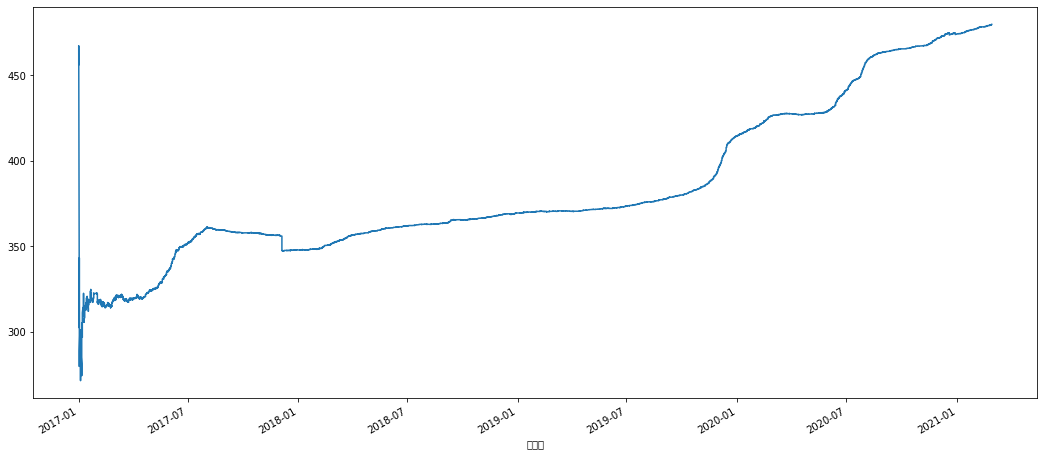

In [74]:
# y = 누적 평균값

df['누적평균값'].plot(figsize=(18,8));
# dong.head()

In [75]:
df.describe().transpose().applymap(np.ceil)

,count,mean,std,min,25%,50%,75%,max
거래금액,24417.0,36995.0,21575.0,1800.0,23000.0,34000.0,48500.0,170000.0
전용면적,24417.0,78.0,24.0,13.0,60.0,85.0,85.0,210.0
누적평균값,24417.0,400.0,46.0,272.0,361.0,398.0,435.0,480.0
아파트세종,24417.0,109.0,16.0,96.0,99.0,101.0,114.0,146.0
아파트전국,24417.0,101.0,3.0,98.0,100.0,101.0,102.0,109.0
전체세종,24417.0,109.0,14.0,96.0,101.0,102.0,114.0,142.0
전체서울,24417.0,107.0,5.0,98.0,104.0,109.0,109.0,113.0
아파트서울,24417.0,108.0,6.0,97.0,105.0,111.0,111.0,115.0
전체전국,24417.0,102.0,3.0,99.0,101.0,101.0,103.0,109.0


In [76]:
df.dtypes

법정동       object
거래금액       int64
전용면적     float64
누적평균값    float64
아파트세종    float64
아파트전국    float64
전체세종     float64
전체서울     float64
아파트서울    float64
전체전국     float64
dtype: object

In [77]:
df.head()

,법정동,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국
년월일,,,,,,,,,,
2017-01-01,종촌동,27300,59.8652,456.024535,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-01,보람동,8600,16.9849,467.143179,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,조치원읍,13000,84.9228,302.275597,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,아름동,31300,84.9280,325.090018,95.9,99.0,96.0,97.1,96.3,98.7
2017-01-02,어진동,7600,17.4250,332.417230,95.9,99.0,96.0,97.1,96.3,98.7


In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
# 스케일을 적용할 column을 정의합니다.
scale_cols = ['거래금액','전용면적','누적평균값', '아파트세종', '아파트전국','전체세종','전체서울','아파트서울','전체전국']
# 스케일 후 columns
scaled = scaler.fit_transform(df[scale_cols])
scaled

array([[0.15160523, 0.24205085, 0.88671403, ..., 0.        , 0.        ,
        0.        ],
       [0.04042806, 0.02439021, 0.94015014, ..., 0.        , 0.        ,
        0.        ],
       [0.0665874 , 0.36924337, 0.14779795, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.52734839, 0.36962965, 0.99981435, ..., 1.        , 1.        ,
        1.        ],
       [0.73246136, 0.49416691, 0.99999927, ..., 1.        , 1.        ,
        1.        ],
       [0.0597503 , 0.06058365, 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [79]:
df = pd.DataFrame(scaled, columns=scale_cols)


In [80]:
df

,거래금액,전용면적,누적평균값,아파트세종,아파트전국,전체세종,전체서울,아파트서울,전체전국
0,0.151605,0.242051,0.886714,0.003976,0.1,0.0,0.0,0.0,0.0
1,0.040428,0.024390,0.940150,0.003976,0.1,0.0,0.0,0.0,0.0
2,0.066587,0.369243,0.147798,0.003976,0.1,0.0,0.0,0.0,0.0
3,0.175386,0.369270,0.257444,0.003976,0.1,0.0,0.0,0.0,0.0
4,0.034483,0.026624,0.292658,0.003976,0.1,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
24412,0.399524,0.301028,0.999689,1.000000,1.0,1.0,1.0,1.0,1.0
24413,0.061534,0.073984,0.999687,1.000000,1.0,1.0,1.0,1.0,1.0
24414,0.527348,0.369630,0.999814,1.000000,1.0,1.0,1.0,1.0,1.0
24415,0.732461,0.494167,0.999999,1.000000,1.0,1.0,1.0,1.0,1.0


In [81]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df.drop('누적평균값', 1), df['누적평균값'], test_size=0.2, random_state=0, shuffle=False)


In [82]:
import tensorflow as tf
def windowed_dataset(series, window_size, batch_size, shuffle):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    if shuffle:
        ds = ds.shuffle(1000)
    ds = ds.map(lambda w: (w[:-1], w[-1]))
    return ds.batch(batch_size).prefetch(1)

In [83]:
WINDOW_SIZE=30
BATCH_SIZE=32

In [84]:
# trian_data는 학습용 데이터셋, test_data는 검증용 데이터셋 입니다.
train_data = windowed_dataset(y_train, WINDOW_SIZE, BATCH_SIZE, True)
test_data = windowed_dataset(y_test, WINDOW_SIZE, BATCH_SIZE, False)

In [85]:
# 아래의 코드로 데이터셋의 구성을 확인해 볼 수 있습니다.
# X: (batch_size, window_size, feature)
# Y: (batch_size, feature)
for data in train_data.take(1):
    print(f'데이터셋(X) 구성(batch_size, window_size, feature갯수): {data[0].shape}')
    print(f'데이터셋(Y) 구성(batch_size, window_size, feature갯수): {data[1].shape}')

데이터셋(X) 구성(batch_size, window_size, feature갯수): (32, 30, 1)
데이터셋(Y) 구성(batch_size, window_size, feature갯수): (32, 1)


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Conv1D, Lambda
from tensorflow.keras.losses import Huber
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


model = Sequential([
    # 1차원 feature map 생성
    Conv1D(filters=32, kernel_size=5,
           padding="causal",
           activation="relu",
           input_shape=[WINDOW_SIZE, 1]),
    # LSTM
    LSTM(32, activation='tanh'),
    Dense(32, activation="relu"),
    Dense(1),
])

In [87]:
# Sequence 학습에 비교적 좋은 퍼포먼스를 내는 Huber()를 사용합니다.
loss = Huber()
optimizer = Adam(0.0005)
model.compile(loss=Huber(), optimizer=optimizer, metrics=['mse'])

In [88]:
# earlystopping은 10번 epoch통안 val_loss 개선이 없다면 학습을 멈춥니다.
earlystopping = EarlyStopping(monitor='val_loss', patience=5)
# val_loss 기준 체크포인터도 생성합니다.
filename = os.path.join('tmp', 'ckeckpointer.ckpt')
checkpoint = ModelCheckpoint(filename, 
                             save_weights_only=True, 
                             save_best_only=True, 
                             monitor='val_loss', 
                             verbose=1)

In [89]:
history = model.fit(train_data, 
                    validation_data=(test_data), 
                    epochs=30, 
                    callbacks=[checkpoint, earlystopping])

Epoch 1/30
610/610 [==============================] - 11s 15ms/step - loss: 0.0016 - mse: 0.0032 - val_loss: 1.1454e-04 - val_mse: 2.2909e-04

Epoch 00001: val_loss improved from inf to 0.00011, saving model to tmp/ckeckpointer.ckpt
Epoch 2/30
610/610 [==============================] - 9s 15ms/step - loss: 8.5495e-06 - mse: 1.7099e-05 - val_loss: 6.3054e-05 - val_mse: 1.2611e-04

Epoch 00002: val_loss improved from 0.00011 to 0.00006, saving model to tmp/ckeckpointer.ckpt
Epoch 3/30
610/610 [==============================] - 9s 15ms/step - loss: 8.1820e-06 - mse: 1.6364e-05 - val_loss: 8.2892e-05 - val_mse: 1.6578e-04

Epoch 00003: val_loss did not improve from 0.00006
Epoch 4/30
610/610 [==============================] - 9s 15ms/step - loss: 8.5373e-06 - mse: 1.7075e-05 - val_loss: 7.5517e-05 - val_mse: 1.5103e-04

Epoch 00004: val_loss did not improve from 0.00006
Epoch 5/30
610/610 [==============================] - 9s 15ms/step - loss: 7.1501e-06 - mse: 1.4300e-05 - val_loss: 8.767

In [90]:
model.load_weights(filename)
pred = model.predict(test_data)


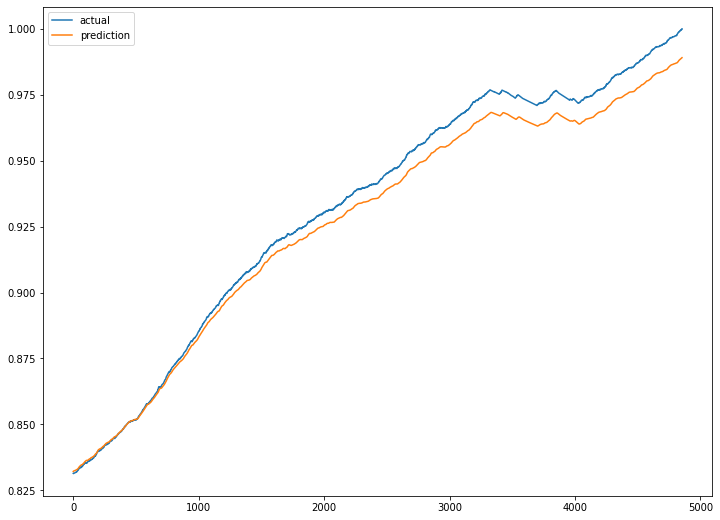

In [91]:
plt.figure(figsize=(12, 9))
plt.plot(np.asarray(y_test)[30:], label='actual')
plt.plot(pred, label='prediction')
plt.legend()
plt.show()